# <span style="color : #620012"> <u>Projet 5 - Optimisez la gestion des données d'une boutique avec Python</u></span>

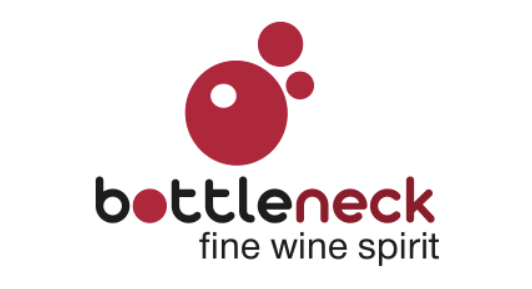

## <span style="color : #620012"> <u>1 - Importation des librairies</u></span>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <span style="color : #620012"> <u>2 - Importation des tables</u></span>

In [2]:
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

In [3]:
erp.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
5,4040,1,34.3,0,outofstock
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock
8,4043,1,60.0,12,instock
9,4045,1,42.6,66,instock


In [4]:
web.head(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:13:35,...,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:45:14,...,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0,0,0,0.0,7.0,taxable,NaN,2.0,2018-02-12 09:54:27,...,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 10:03:05,...,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
liaison.head(10)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042
8,4043,14980
9,4045,16041


## <span style="color : #620012"> <u>3 - Nettoyage de données</u></span>

## <span style="color : #89383a"> <u>3.1 - Dataframe erp</u></span>

### <span style="color : #a45e5d"> <u>3.1.1 - Vérification du type de variables </u></span>

In [6]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

### <span style="color : #a45e5d"> <u>3.1.2 - Comptabiliser les valeurs manquantes </u></span>

In [7]:
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


### <span style="color : #a45e5d"> <u>3.1.3 - Vérifier l'unicité des clés primaires </u></span>

In [8]:
erp['product_id'].duplicated().sum()

0

###### Les clés primaires sont toutes uniques dans ce dataframe

##  <span style="color : #89383a"> <u>3.2 - Dataframe web</u></span>

### <span style="color : #a45e5d"> <u> 3.2.1 - Suppression des séries contenant des valeurs uniques</u></span>

In [9]:
web_unique = web.apply(pd.Series.nunique)
drop_col = web_unique[web_unique==1].index
web=web.drop(drop_col, axis=1)
web.head()

,sku,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


### <span style="color : #a45e5d"> <u>3.2.2 - Renommer la colonne sku du dataframe web</u></span>

In [10]:
web.rename(
    columns={
        'sku':'id_web',
        },
    inplace=True
)
web.head()

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


### <span style="color : #a45e5d"> <u>3.2.3 - Vérification du type de variables</u></span>

In [11]:
web.dtypes

id_web                           object
total_sales                     float64
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
guid                             object
post_type                        object
dtype: object

### <span style="color : #a45e5d"> <u>3.2.4 - Comptabiliser les valeurs manquantes </u></span>

In [12]:
print(web.isnull().sum())

id_web                     85
total_sales                83
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
guid                       83
post_type                  83
dtype: int64


### <span style="color : #a45e5d"> <u>3.2.5 - Supprimer les clés primaires nulles</u></span>

In [13]:
web.dropna(subset=['id_web'],inplace = True)

In [14]:
# vérification
print(web.isnull().sum())

id_web                      0
total_sales                 0
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
guid                        0
post_type                   0
dtype: int64


### <span style="color : #a45e5d"> <u>3.2.6 - Vérifier l'unicité des clés primaires </u></span>

In [15]:
web['id_web'].duplicated().sum()

714

###### il y a 714 doublons dans les clés primaires 

### <span style="color : #a45e5d"> <u>3.2.7 - Regrouper les id_web en double et les compter</u></span>

In [16]:
web.groupby('id_web').agg({'id_web':'count'})

,id_web
id_web,
38,2
41,2
304,2
523,2
531,2
...,...
19820,2
19821,2
19822,2


### <span style="color : #a45e5d"> <u>3.2.8 - Visualisation des doublons </u></span>

In [17]:
web.loc[web['id_web']==304]

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
70,304,40.0,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,NaN,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",NaN,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
868,304,40.0,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,NaN,Champagne Gosset Grande Réserve,NaN,NaN,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [18]:
web.loc[web['id_web']==19822]

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
527,19822,0.0,NaN,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,NaN,Tempier Bandol Cabassaou 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",NaN,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1301,19822,0.0,NaN,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,NaN,Tempier Bandol Cabassaou 2017,NaN,NaN,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


### <span style="color : #a45e5d"> <u>3.2.9 - Supprimer les clés primaires en double</u></span>

In [19]:
web.drop(web[(web['post_type']=='attachment')].index, inplace=True)

In [20]:
web['id_web'].duplicated().sum()

0

In [21]:
web.reset_index(drop=True)

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
710,15891,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
711,15887,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
712,13127-1,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


## <span style="color : #620012"> <u>4 - Demandes de Laurent</u></span>

## <span style="color : #89383a"> <u>4.1 - Rapprochement de l'export ERP et de la table de l'outil de CMS</u></span>

### <span style="color : #a45e5d"> <u>4.1.1 - Jointure des dataframes liaison et web</u></span>

In [22]:
web_liaison = pd.merge(web,liaison, how='outer', on='id_web', indicator=True)
web_liaison.head()

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,product_id,_merge
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4954,both
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3847,both
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3849,both
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3850,both
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4032,both


In [23]:
web_merge=web_liaison['_merge'].value_counts()
print(web_merge)

both          714
right_only    111
left_only       0
Name: _merge, dtype: int64


##### Visualisation des 111 lignes n'ayant pas mergé

In [24]:
web_liaison.loc[web_liaison['_merge']=='right_only'].head(10)

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,product_id,_merge
714,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4055,right_only
715,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4090,right_only
716,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4092,right_only
717,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4195,right_only
718,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4209,right_only
719,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4233,right_only
720,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4278,right_only
721,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4279,right_only
722,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4565,right_only
723,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4577,right_only


###### Création d'un dataframe avec uniquement les lignes non mergées (right_only)

In [25]:
non_merge=web_liaison.loc[web_liaison['_merge']=='right_only',:]
non_merge.head(10)

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,product_id,_merge
714,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4055,right_only
715,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4090,right_only
716,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4092,right_only
717,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4195,right_only
718,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4209,right_only
719,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4233,right_only
720,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4278,right_only
721,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4279,right_only
722,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4565,right_only
723,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4577,right_only


###### Comptabiliser les valeurs nulles

In [26]:
print(non_merge.isnull().sum())

id_web                    91
total_sales              111
tax_class                111
post_author              111
post_date                111
post_date_gmt            111
post_content             111
post_title               111
post_excerpt             111
post_password            111
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    111
guid                     111
post_type                111
product_id                 0
_merge                     0
dtype: int64


###### Toutes les séries comportent uniquement des valeurs nulles à l'exception de la série "product_id" et de 20  "id_web"

###### Recherche des 20 id_web qui ne sont pas nuls

In [27]:
non_merge['id_web']

714        NaN
715        NaN
716        NaN
717        NaN
718        NaN
        ...   
820      15609
821      14377
822      13577
823      15529
824    14680-1
Name: id_web, Length: 111, dtype: object

In [28]:
non_merge.tail(20)

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,product_id,_merge
805,13771,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4289,right_only
806,15065,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4568,right_only
807,14785,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4584,right_only
808,12601,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4741,right_only
809,15154,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4864,right_only
810,14360,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4869,right_only
811,15608,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4921,right_only
812,15586,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,4922,right_only
813,15272,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,5018,right_only
814,15630,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,5021,right_only


###### Les 20 "id_web" non nuls n'ont que des valeurs nulles qui leurs sont associés dans le dataframe tout comme la série "product_id"

###### Suppression des séries ne contenant que des valeurs nulles 

In [29]:
non_merge.dropna(axis=1, inplace=True)
non_merge.head(10)

,product_id,_merge
714,4055,right_only
715,4090,right_only
716,4092,right_only
717,4195,right_only
718,4209,right_only
719,4233,right_only
720,4278,right_only
721,4279,right_only
722,4565,right_only
723,4577,right_only


###### Suppression de la série "_merge"

In [30]:
non_merge.drop(['_merge'], axis=1, inplace=True)

###### La série "product_id" n'étant associée qu'à des valeurs nulles, je peux à présent la supprimer 

### <span style="color : #a45e5d"> <u>4.1.2 - 111 lignes non mergées (right_only), conserver uniquement les lignes ayant mergé (both)</u></span>

In [31]:
web_liaison=web_liaison.loc[web_liaison['_merge']=='both',:]
web_liaison.head()

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,product_id,_merge
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4954,both
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3847,both
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3849,both
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3850,both
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4032,both


In [32]:
web_merge=web_liaison['_merge'].value_counts()
print(web_merge)

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64


In [33]:
web_liaison.drop(['_merge'], axis=1, inplace=True)

### <span style="color : #a45e5d"> <u>4.1.3 - Jointure des dataframes erp et web_liaison </u></span>

In [34]:
web_liaison_erp = pd.merge(web_liaison,erp, how='outer', on='product_id', indicator=True)
web_liaison_erp.head()

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,...,post_modified_gmt,post_content_filtered,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,...,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4954,1,25.0,0,instock,both
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,...,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3847,1,24.2,0,outofstock,both
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,...,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3849,1,34.3,0,outofstock,both
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,...,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,3850,1,20.8,0,outofstock,both
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,...,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,4032,1,14.1,0,outofstock,both


In [35]:
erp_merge=web_liaison_erp['_merge'].value_counts()
print(erp_merge)

both          714
right_only    111
left_only       0
Name: _merge, dtype: int64


###### Création d'un dataframe avec uniquement les lignes non mergées (right_only)

In [36]:
non_merge2=web_liaison_erp.loc[web_liaison_erp['_merge']=='right_only',:]
non_merge2.head(10)

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,...,post_modified_gmt,post_content_filtered,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge
714,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4055,0,86.1,0,outofstock,right_only
715,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4090,0,73.0,0,outofstock,right_only
716,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4092,0,47.0,0,outofstock,right_only
717,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4195,0,14.1,0,outofstock,right_only
718,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4209,0,73.5,0,outofstock,right_only
719,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4233,0,20.0,0,outofstock,right_only
720,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4278,0,21.5,0,outofstock,right_only
721,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4279,0,10.8,0,outofstock,right_only
722,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4289,0,22.8,0,outofstock,right_only
723,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4565,0,30.5,3,instock,right_only


###### Comptabiliser les valeurs nulles

In [37]:
print(non_merge2.isnull().sum())

id_web                   111
total_sales              111
tax_class                111
post_author              111
post_date                111
post_date_gmt            111
post_content             111
post_title               111
post_excerpt             111
post_password            111
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    111
guid                     111
post_type                111
product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
_merge                     0
dtype: int64


In [38]:
non_merge2['onsale_web'].describe()

count    111.000000
mean       0.027027
std        0.162898
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: onsale_web, dtype: float64

##### Supprimer les séries ne contenant que des valeurs nulles

In [39]:
non_merge2.dropna(axis=1, inplace=True)
non_merge2.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,_merge
714,4055,0,86.1,0,outofstock,right_only
715,4090,0,73.0,0,outofstock,right_only
716,4092,0,47.0,0,outofstock,right_only
717,4195,0,14.1,0,outofstock,right_only
718,4209,0,73.5,0,outofstock,right_only
719,4233,0,20.0,0,outofstock,right_only
720,4278,0,21.5,0,outofstock,right_only
721,4279,0,10.8,0,outofstock,right_only
722,4289,0,22.8,0,outofstock,right_only
723,4565,0,30.5,3,instock,right_only


In [40]:
non_merge2.tail(10)

,product_id,onsale_web,price,stock_quantity,stock_status,_merge
815,7192,0,31.0,28,instock,right_only
816,7193,0,27.0,14,instock,right_only
817,7194,0,31.0,5,instock,right_only
818,7195,0,21.0,1,instock,right_only
819,7196,0,31.0,55,instock,right_only
820,7200,0,31.0,6,instock,right_only
821,7201,0,31.0,18,instock,right_only
822,7203,0,45.0,30,instock,right_only
823,7204,0,45.0,9,instock,right_only
824,7329,0,26.5,14,instock,right_only


###### Export sur excel pour vérification

In [41]:
non_merge2.to_excel('non_merge2.xlsx', sheet_name='verification')

###### Après suppression de toutes les valeurs nulles, il ne reste que les produits ayant été vendus sur le web mais pas la quantité de vente de chaque produit donc il est impossible de calculer un CA sur ces produits là. Je peux donc les supprimer également.

###  <span style="color : #a45e5d"> <u>4.1.4 - 111 lignes non mergées (right_only), conserver uniquement les lignes ayant mergé (both)</u></span>

In [42]:
web_liaison_erp=web_liaison_erp.loc[web_liaison_erp['_merge']=='both',:]

In [43]:
erp_merge=web_liaison_erp['_merge'].value_counts()
print(erp_merge)

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64


###  <span style="color : #a45e5d"> <u>4.1.5 - Supprimer les colonnes contenant des valeurs uniques</u></span>

In [44]:
valeur_unique = web_liaison_erp.apply(pd.Series.nunique)
drop_col = valeur_unique[valeur_unique==1].index
web_liaison_erp=web_liaison_erp.drop(drop_col, axis=1)
web_liaison_erp.head()

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,product_id,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,4954,25.0,0,instock
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,3847,24.2,0,outofstock
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,3849,34.3,0,outofstock
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,3850,20.8,0,outofstock
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,4032,14.1,0,outofstock


### <span style="color : #a45e5d"> <u>4.1.6 - comptabiliser les valeurs nulles</u></span>

In [45]:
print(web_liaison_erp.isnull().sum())

id_web                     0
total_sales                0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
guid                       0
product_id                 0
price                      0
stock_quantity             0
stock_status               0
dtype: int64


In [46]:
web[['tax_class','post_password','post_content','post_content_filtered']].describe()

,tax_class,post_password,post_content,post_content_filtered
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


###### Les séries contenant uniquement des valeurs nulles après le merge ne contenaient déjà que des valeurs nulles sur le fichier de départ "web" qui à été fournit. Je peux donc supprimer ces séries.

### <span style="color : #a45e5d"> <u>4.1.7 - Supprimer les colonnes contenant uniquement des valeurs nulles</u></span>

In [47]:
web_liaison_erp.dropna(axis=1, inplace=True)
web_liaison_erp.head()

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,25.0,0,instock
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,3847,24.2,0,outofstock
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,3849,34.3,0,outofstock
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,3850,20.8,0,outofstock
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,4032,14.1,0,outofstock


## <span style="color : #89383a"> <u>4.2 - Chiffre d'affaires par produit </u></span>

### <span style="color : #a45e5d"> <u>4.2.1 - Création d'une nouvelle colonne pour effectuer le calcul du CA par produit</u></span>

In [48]:
web_liaison_erp = web_liaison_erp.assign(CA_produit=web_liaison_erp['total_sales']*web_liaison_erp['price'])
web_liaison_erp.head()

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,price,stock_quantity,stock_status,CA_produit
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,25.0,0,instock,250.0
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,3847,24.2,0,outofstock,145.2
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,3849,34.3,0,outofstock,0.0
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,3850,20.8,0,outofstock,0.0
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,4032,14.1,0,outofstock,42.3


### <span style="color : #a45e5d"> <u>4.2.2 - Total du chiffre d'affaires réalisé en ligne</u></span>

### <span style="color : #a45e5d"> <u>4.2.3 - Calcule du CA total des produits vendus en ligne</u></span>

In [49]:
CAtot_ligne=np.sum(web_liaison_erp['CA_produit'])
print("Le chiffre d'affaires total des produits vendus en ligne est de ",CAtot_ligne)

Le chiffre d'affaires total des produits vendus en ligne est de  70568.6


## <span style="color : #89383a"> <u>4.3 - Détecter les valeurs aberrantes dans les prix des produits</u></span>

### <span style="color : #a45e5d"> <u>4.3.1 - Représentation graphique des valeurs aberrantes</u></span>

<AxesSubplot:xlabel='price'>

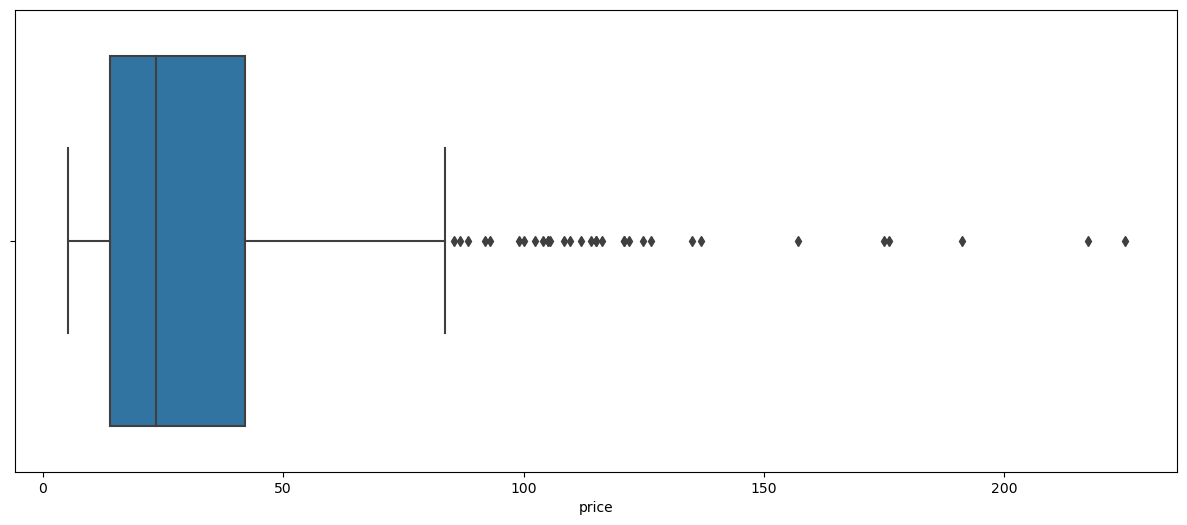

In [50]:
figure=plt.figure(figsize=(15,6))
sns.boxplot(web_liaison_erp['price'])

### <span style="color : #a45e5d"> <u>4.3.2 - Définir les valeurs aberrantes</u></span>

In [51]:
q1 = web_liaison_erp["price"].quantile(0.25)
q3 = web_liaison_erp["price"].quantile(0.75)
iqr = q3 - q1

In [52]:
valeur_abe_inf=q1-1.5*iqr
print(round(valeur_abe_inf,2))

-28.01


In [53]:
valeur_abe_sup=q3+1.5*iqr
print(round(valeur_abe_sup,2))

84.29


### <span style="color : #a45e5d"> <u>4.3.3 - Affichage des valeurs aberrantes</u></span>

In [54]:
valeurs_abe = (web_liaison_erp.loc[web_liaison_erp["price"]>=84.29])
valeurs_abe.sort_values(by=['price'],ascending=False)

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,price,stock_quantity,stock_status,CA_produit
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,225.0,0,outofstock,1125.0
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,217.5,20,instock,0.0
587,14983,3.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,5892,191.3,10,instock,573.9
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,176.0,8,instock,2288.0
553,15185,0.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,5767,175.0,12,instock,0.0
222,7819,0.0,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,4406,157.0,3,instock,0.0
382,14220,5.0,2.0,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,"Ce Corton Charlemagne éblouit par son assise, ...",domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,https://www.bottle-neck.fr/?post_type=product&...,4904,137.0,13,instock,685.0
642,14923,2.0,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,6126,135.0,10,instock,270.0
202,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,4355,126.5,2,instock,1391.5
511,14915,0.0,2.0,2019-01-15 15:30:49,2019-01-15 14:30:49,Domaine Weinbach Gewurztraminer Grand Cru Furs...,"Né sur un sol marno-gréseux, ce Furstentum est...",domaine-weinbach-gewurztraminer-gc-furstentum-...,2019-01-23 09:33:57,2019-01-23 08:33:57,https://www.bottle-neck.fr/?post_type=product&...,5612,124.8,12,instock,0.0


In [55]:
valeurs_abe['price'].count()

32

###### Il y a 32 valeurs aberrantes recencées dans ce dataframe. Cependant, après vérification des prix de certains produits, ces valeurs se révèlent aberrantes uniquement dans ce calcule.